In [11]:
%load_ext autoreload
%autoreload 2

# initial imports. Notice this uses devs tensiometer...
import sys, os, copy, time
import numpy as np
here = './'
temp_path = os.path.realpath(os.path.join(os.getcwd(), here+'tensiometer'))
sys.path.insert(0, temp_path)
import tensiometer.synthetic_probability as synthetic_probability
import tensiometer.mcmc_tension as mcmc_tension
import tensiometer.utilities as utilities
import tensiometer.gaussian_tension as gtension

from getdist import plots
from getdist.gaussian_mixtures import GaussianND

import chain_import as ci

# initial set up:

# results directory:
out_dir = here+'results'
if out_dir is not None:
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

# prepare for chains import.
chains_dir = here+'data/'

# getdist settings:
settings = {'ignore_rows': 0.3, 'smooth_scale_1D': 0.3, 'smooth_scale_2D': 0.3}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# load chain in MCSample:
file_name = chains_dir+"IGWN-GWTC3p0-v1-GW200112_155838_PEDataRelease_mixed_nocosmo.h5"
chain = ci.samples_from_GW_data(file_name, settings=settings)

In [16]:
# parameter names for names in the chain:
chain.getParamNames().list()

['chirp_mass',
 'mass_ratio',
 'a_1',
 'a_2',
 'tilt_1',
 'tilt_2',
 'phi_12',
 'phi_jl',
 'theta_jn',
 'psi',
 'phase',
 'azimuth',
 'zenith',
 'recalib_L1_amplitude_0',
 'recalib_L1_amplitude_1',
 'recalib_L1_amplitude_2',
 'recalib_L1_amplitude_3',
 'recalib_L1_amplitude_4',
 'recalib_L1_amplitude_5',
 'recalib_L1_amplitude_6',
 'recalib_L1_amplitude_7',
 'recalib_L1_amplitude_8',
 'recalib_L1_amplitude_9',
 'recalib_L1_phase_0',
 'recalib_L1_phase_1',
 'recalib_L1_phase_2',
 'recalib_L1_phase_3',
 'recalib_L1_phase_4',
 'recalib_L1_phase_5',
 'recalib_L1_phase_6',
 'recalib_L1_phase_7',
 'recalib_L1_phase_8',
 'recalib_L1_phase_9',
 'recalib_V1_amplitude_0',
 'recalib_V1_amplitude_1',
 'recalib_V1_amplitude_2',
 'recalib_V1_amplitude_3',
 'recalib_V1_amplitude_4',
 'recalib_V1_amplitude_5',
 'recalib_V1_amplitude_6',
 'recalib_V1_amplitude_7',
 'recalib_V1_amplitude_8',
 'recalib_V1_amplitude_9',
 'recalib_V1_phase_0',
 'recalib_V1_phase_1',
 'recalib_V1_phase_2',
 'recalib_V1_phas

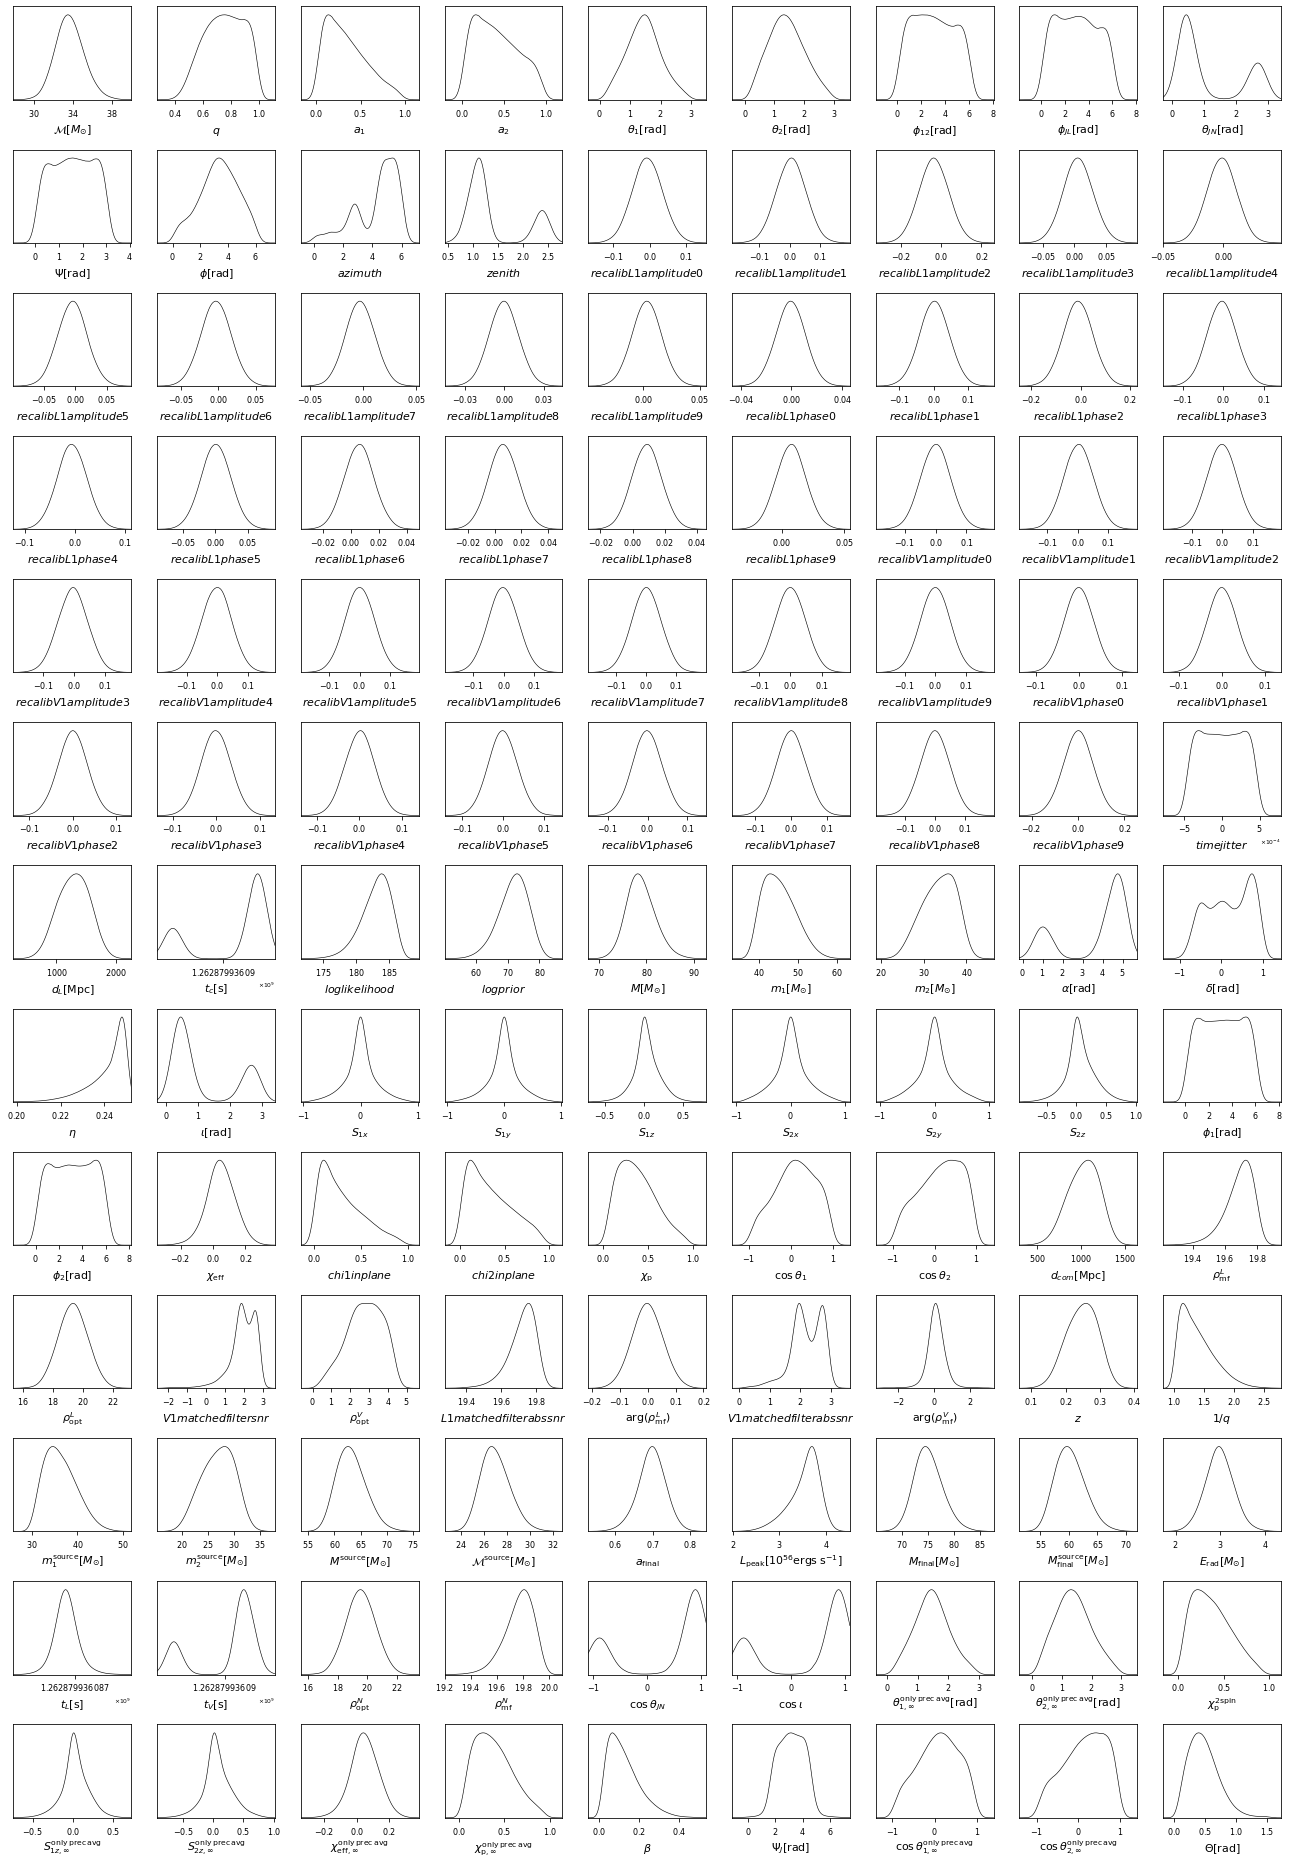

In [17]:
# simple plot, check https://getdist.readthedocs.io/en/latest/plot_gallery.html for more:
g = plots.get_subplot_plotter();
g.plots_1d([chain]);

In [18]:
# get covariance:
chain.cov()

array([[ 2.22945297e+00,  9.15043724e-02,  5.38928835e-02, ...,
         2.37212540e-01,  2.45924191e-01,  7.32991230e-03],
       [ 9.15043724e-02,  2.05107875e-02,  1.50513407e-03, ...,
        -2.38984237e-03,  1.11973542e-02,  5.21702158e-03],
       [ 5.38928835e-02,  1.50513407e-03,  5.57004759e-02, ...,
        -3.11835988e-03, -4.81292377e-03, -2.12654821e-03],
       ...,
       [ 2.37212540e-01, -2.38984237e-03, -3.11835988e-03, ...,
         2.46119001e-01, -1.02417626e-01, -2.80988783e-03],
       [ 2.45924191e-01,  1.11973542e-02, -4.81292377e-03, ...,
        -1.02417626e-01,  2.70003421e-01,  4.62887890e-03],
       [ 7.32991230e-03,  5.21702158e-03, -2.12654821e-03, ...,
        -2.80988783e-03,  4.62887890e-03,  6.27889914e-02]])

KeyboardInterrupt: 

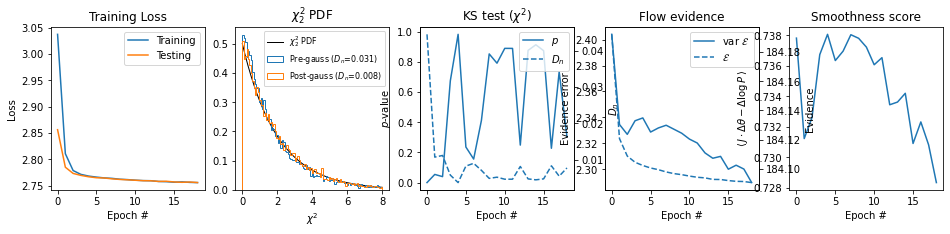

In [24]:
# train the flow:
synthetic_probability.flow_from_chain(chain, param_names=['chirp_mass', 'mass_ratio'])